In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

C:\Users\tomco\AppData\Local\Temp\ipykernel_13580\975059756.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Switch to decimal format in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# Load the housing data
df = pd.read_csv("Housing.csv")

In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.000,545.000,545.000,545.000,545.000,545.000
mean,4766729.248,5150.541,2.965,1.286,1.806,0.694
std,1870439.616,2170.141,0.738,0.502,0.867,0.862
min,1750000.000,1650.000,1.000,1.000,1.000,0.000
25%,3430000.000,3600.000,2.000,1.000,1.000,0.000
50%,4340000.000,4600.000,3.000,1.000,2.000,0.000
75%,5740000.000,6360.000,3.000,2.000,2.000,1.000
max,13300000.000,16200.000,6.000,4.000,4.000,3.000


In [5]:
# Many of the variables are non-numeric
# E.g. yes/no columns and the status of furnishing
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [10]:
from sklearn.preprocessing import OneHotEncoder
variables = ['furnishingstatus']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [12]:
# see the materials on this trick, we can remove the last new column "unfurnished"
# since if the house is unfurnished, both furnished and semi-furnished will be 0
df.drop("furnishingstatus_unfurnished", axis=1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0


In [13]:
df.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,0,0,1


In [14]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [15]:
# if you have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished']]

# have only the target variable here (dependent variable)
y = df['price']

In [16]:
# a nice trick to get all 6 variables for our neural network
# first split 70% for training data, and save the last 30% for temporary variables
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# then split again the temporary variables by 50% (so if it was 30% originally => now it's
# 15%/15% (because 30% * 50% = 15%))

# so after this, we have 70% for training, 15% testing, and 15% validation
# => 100% in total
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [17]:
training_variable_amount = len(X.columns)

# create the structure of our neural network
model = keras.Sequential(
    [
        layers.Dense(12, activation="relu", input_shape=(training_variable_amount,)),
        layers.Dense(8, activation="relu"),
        layers.Dense(1)
    ]
)

# compile the neural network, use adam (most common one) as the optimiser
# and mean square error (mse) for the loss function (most common for regression problems)
model.compile(optimizer="adam", loss="mse")

# show a quick recap of our structure
model.summary()

# start training
model.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_val, y_val))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                168       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200

12/12 [==============================] - 2s 35ms/step - loss: 25892334075904.0000 - val_loss: 25223810252800.0000
Epoch 2/200
12/12 [==============================] - 0s 9ms/step - loss: 25890071248896.0000 - val_loss: 25221572591616.0000
Epoch 3/200
12/12 [=================

<Axes: >

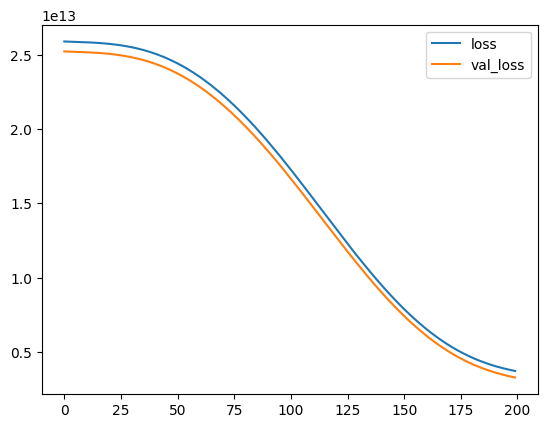

In [35]:
# Seeing if the model overfits
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()